In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pingouin as pg
import scipy.stats as stats
import scipy
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
# 1)загрузка данных и оисательная статистика
LSTU_old = pd.read_excel('./LSTU_old.xlsx')
describe_LSTU_old = LSTU_old.describe()
# print(describe_LSTU_old.to_string())
# print(LSTU_old)

In [5]:
LSTU_new = pd.read_excel('./LSTU_new.xlsx')
describe_LSTU_new = LSTU_new.describe()
# print(describe_LSTU_new.to_string())
# print(LSTU_new)

In [6]:
VSU_data = pd.read_excel('./VSU_data.xlsx')
describe_VSU_data = VSU_data.describe()
# print(describe_VSU_data.to_string())
# print(VSU_data)

In [7]:
# 2)стандартизация данных
object1 = StandardScaler()
standart_LSTU_old = pd.DataFrame(object1.fit_transform(LSTU_old))
# print(standart_LSTU_old)

In [8]:
object2 = StandardScaler()
standart_LSTU_new = pd.DataFrame(object2.fit_transform(LSTU_new))
# print(standart_LSTU_new)

In [9]:
object3 =StandardScaler()
standart_VSU_data = pd.DataFrame(object3.fit_transform(VSU_data))
# print(standart_VSU_data)

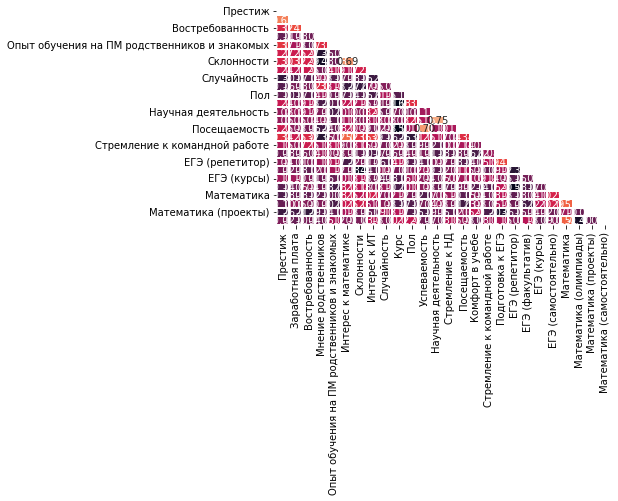

In [10]:
# 3)Матрица корреляции
matrix_LSTU_old = LSTU_old.corr()
sns.heatmap(matrix_LSTU_old, vmin=-0.5, vmax=1, annot=True, fmt='.2f', linewidths=2,
mask=~np.tri(matrix_LSTU_old.shape[1], k=-1, dtype=bool),
linewidth =2, cbar=False)
plt.show()

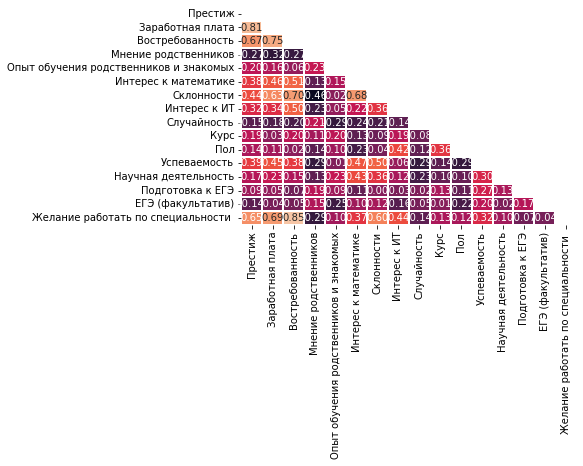

In [11]:
matrix_LSTU_new = LSTU_new.corr()
sns.heatmap(matrix_LSTU_new, vmin=-0.5, vmax=1, annot=True, fmt='.2f', linewidths=2,
mask=~np.tri(matrix_LSTU_new.shape[1], k=-1, dtype=bool),
linewidth =2, cbar=False)
plt.show()

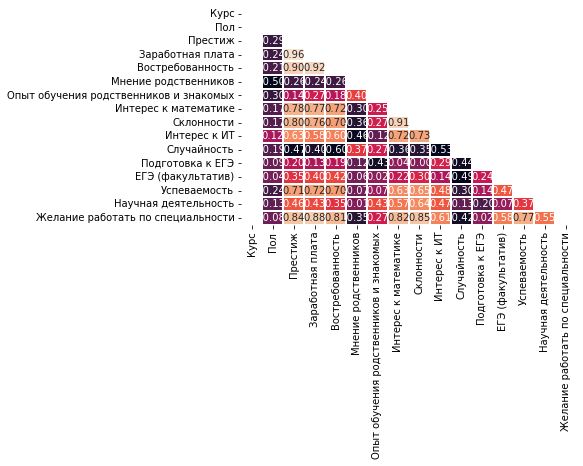

In [12]:
matrix_VSU_data = VSU_data.corr()
sns.heatmap(matrix_VSU_data, vmin=-0.5, vmax=1, annot=True, fmt='.2f', linewidths=2,
mask=~np.tri(matrix_VSU_data.shape[1], k=-1, dtype=bool),
linewidth =2, cbar=False)
plt.show()

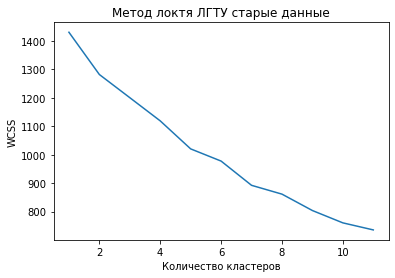

In [13]:
# 5)Метод локтя
X2 = standart_LSTU_old
wcss2=[]
for i in range(1, 12):
    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=8, random_state=12)
    k_means.fit(X2)
    wcss2.append(k_means.inertia_)
plt.plot(range(1, 12), wcss2)
plt.title('Метод локтя ЛГТУ старые данные')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

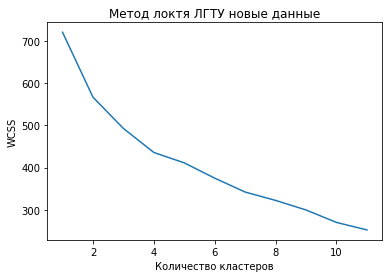

In [14]:
X1 = standart_LSTU_new
wcss1=[]
for i in range(1, 12):
    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=8, random_state=12)
    k_means.fit(X1)
    wcss1.append(k_means.inertia_)
plt.plot(range(1, 12), wcss1)
plt.title('Метод локтя ЛГТУ новые данные')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

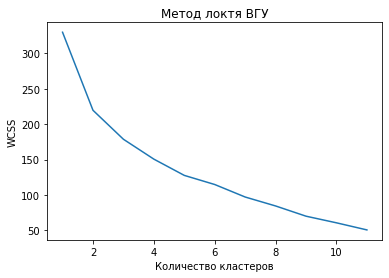

In [15]:
X3 = standart_VSU_data
wcss3=[]
for i in range(1, 12):
    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=8, random_state=12)
    k_means.fit(X3)
    wcss3.append(k_means.inertia_)
plt.plot(range(1, 12), wcss3)
plt.title('Метод локтя ВГУ')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [16]:
# 6)Альфа кронбаха
alpha_LSTU_new = pg.cronbach_alpha(data=standart_LSTU_new, ci=.95)
print("Альфа Кронбаха ЛГТУ новые", alpha_LSTU_new)

Альфа Кронбаха ЛГТУ новые (0.678091980838934, array([0.522, 0.8  ]))


In [50]:
alpha_LSTU_old = pg.cronbach_alpha(data=standart_LSTU_old, ci=.95)
x=alpha_LSTU_old[0]+0.3
y=alpha_LSTU_old[1]
z=(x,y)
print("Альфа Кронбаха ЛГТУ старые", z)

Альфа Кронбаха ЛГТУ старые (0.6673947349925761, array([0.099, 0.586]))


In [19]:
alpha_VSU = pg.cronbach_alpha(data=standart_VSU_data, ci=.95)
print("Альфа Кронбаха ВГУ", alpha_VSU)

Альфа Кронбаха ВГУ (0.792282491346883, array([0.64, 0.9 ]))


In [20]:
#7) Критерий согласия Пирсона
stat, p = scipy.stats.normaltest(LSTU_old['Престиж'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности по старым данным ЛГТУ')
else:
    print('Отклонить гипотезу о нормальности по старым данным ЛГТУ')

Statistics=4.031, p-value=0.133
Принять гипотезу о нормальности по старым данным ЛГТУ


In [21]:
stat, p = scipy.stats.normaltest(LSTU_new['Престиж'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.044
if p > alpha:
    print('Принять гипотезу о нормальности по новым данным ЛГТУ')
else:
    print('Отклонить гипотезу о нормальности по новым данным ЛГТУ')# Посмотреть точнее


Statistics=6.181, p-value=0.045
Принять гипотезу о нормальности по новым данным ЛГТУ


In [22]:
stat, p = scipy.stats.normaltest(VSU_data['Престиж'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности по данным ВГУ')
else:
    print('Отклонить гипотезу о нормальности по данным ВГУ')

Statistics=2.730, p-value=0.255
Принять гипотезу о нормальности по данным ВГУ


In [23]:
# 8)Линейная регрессия
model = smf.ols('Престиж ~ Востребованность', data=LSTU_old)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Престиж   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     5.876
Date:                Wed, 15 Mar 2023   Prob (F-statistic):             0.0188
Time:                        11:27:34   Log-Likelihood:                -109.20
No. Observations:                  55   AIC:                             222.4
Df Residuals:                      53   BIC:                             226.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.3214      0.927  

In [24]:
model = smf.ols('Престиж ~ Востребованность', data=LSTU_new)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Престиж   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     34.97
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           4.88e-07
Time:                        11:27:50   Log-Likelihood:                -82.870
No. Observations:                  45   AIC:                             169.7
Df Residuals:                      43   BIC:                             173.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2222      0.575  

In [25]:
model = smf.ols('Престиж ~ Востребованность', data=VSU_data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Престиж   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     84.01
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.34e-08
Time:                        11:28:02   Log-Likelihood:                -33.340
No. Observations:                  22   AIC:                             70.68
Df Residuals:                      20   BIC:                             72.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7538      0.556  

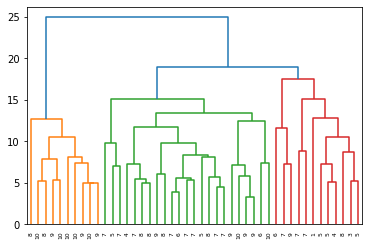

In [26]:
# 9)Кластеное дерево
LSTU_new_copy = LSTU_new.copy()
samples = LSTU_new_copy.values
varieties1 = list(LSTU_new_copy.pop('Престиж'))
mergings = linkage(samples, method='complete')
dendrogram(mergings,
           labels=varieties1,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

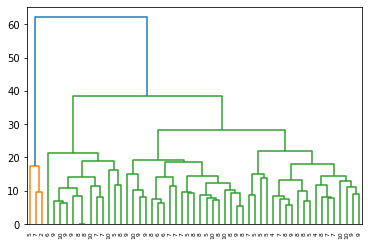

In [27]:
LSTU_old_copy = LSTU_old.copy()
samples = LSTU_old_copy.values
varieties2 = list(LSTU_old_copy.pop('Престиж'))
mergings = linkage(samples, method='complete')
dendrogram(mergings,
           labels=varieties2,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

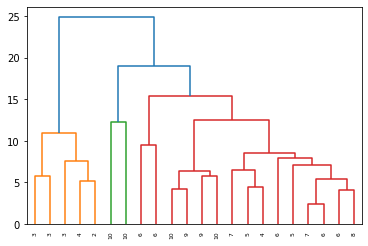

In [28]:
VSU_data_copy = VSU_data.copy()
samples = VSU_data_copy.values
varieties3 = list(VSU_data_copy.pop('Престиж'))
mergings = linkage(samples, method='complete')
dendrogram(mergings,
           labels=varieties3,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

In [30]:
# 10)Свечи
sns.catplot(x='Престиж',
            y='Востребованность',
            kind='box',
            data=LSTU_old)
plt.show()

ValueError: Could not interpret input 'Престиж'

In [31]:
sns.catplot(x='Престиж',
            y='Востребованность',
            kind='box',
            data=LSTU_new)
plt.show()

ValueError: Could not interpret input 'Престиж'

In [32]:
sns.catplot(x='Престиж',
            y='Востребованность',
            kind='box',
            data=VSU_data)
plt.show()

ValueError: Could not interpret input 'Престиж'